In [180]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy.coordinates import Galactocentric
#from os.path import expanduser
#home = expanduser("~")

import astropy.units as u
from galpy.potential import MWPotential2014
from galpy.orbit import Orbit

## Input coordinates, RV, and proper motion:

In [201]:
ra = 133.9*u.deg
dec = 33.6*u.deg
vhel = 89.4*u.km/u.s
dist = 12.7*u.kpc
pmra = -0.94*u.mas/u.yr
pmdec = -0.12*u.mas/u.yr

# Bootes III
#ra = 209.406*u.deg
#dec = 26.6966*u.deg
#vhel = 196.05*u.km/u.s
#dist = 46.0*u.kpc
#pmra = -1.17*u.mas/u.yr
#pmdec = -0.92*u.mas/u.yr

In [202]:
# Create a SkyCoord object with the input properties:
sc_obj = SkyCoord(ra,dec,radial_velocity=vhel,pm_ra_cosdec=pmra,\
                     pm_dec=pmdec,distance=dist)
# Transform to Galactic coordinates, and Cartesian Galactic:
sc_obj_glctc=sc_obj.galactic
sc_obj_cartesian=sc_obj.transform_to(Galactocentric)

In [203]:
# make timesteps
maxtime = 2.0 # time to integrate the orbit, in Gyr
ts = np.linspace(0,maxtime,1000)*u.Gyr # time steps; (t0, t_f, nstep) --> from t=t0 to t=t_f, with nstep steps
# note units! (can change to Myr if desired)

In [204]:
# Generate the galpy Orbit
oo0=Orbit(vxvv=[sc_obj.ra,sc_obj.dec,sc_obj.distance,\
                sc_obj.pm_ra_cosdec,sc_obj.pm_dec,\
                sc_obj.radial_velocity],radec=True,ro=8.0*u.kpc,vo=220.*u.km/u.s)

In [205]:
# Integrate the orbit in the "default" galpy potential (note: 'leapfrog' is slower, but better conserves energy)
oo0.integrate(ts,MWPotential2014)#,method='leapfrog')

# Use the "flip" function to reverse the velocity vectors, then integrate the backwards orbit:
oo0back = oo0.flip()
oo0back.integrate(ts,MWPotential2014)#,method='leapfrog')

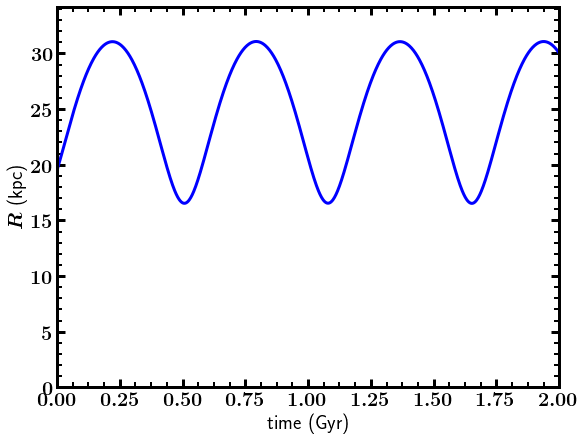

In [206]:
# Plot R_GC vs. time:
params = {
   'axes.labelsize': 20,
   'font.size': 20,
   'legend.fontsize': 10,
#   'xtick.labelsize': 16,
   'xtick.major.width': 3,
   'xtick.minor.width': 2,
   'xtick.major.size': 8,
   'xtick.minor.size': 5,
   'xtick.direction': 'in',
   'xtick.top': True,
   'lines.linewidth':3,
   'axes.linewidth':3,
   'axes.labelweight':3,
   'axes.titleweight':3,
   'ytick.major.width':3,
   'ytick.minor.width':2,
   'ytick.major.size': 8,
   'ytick.minor.size': 5,
   'ytick.direction': 'in',
   'ytick.right': True,
#   'ytick.labelsize': 20,
   'text.usetex': True,
   'text.latex.preamble': r'\boldmath',
   'figure.figsize': [9, 7]
   }

plt.rcParams.update(params)
fig=plt.figure()

maxplotdist = 1.10*np.max(oo0.r(ts))

plt.xlim(0,maxtime)
plt.ylim(0,maxplotdist)

plt.plot(ts,oo0.r(ts),'b')
#plt.plot(ts,oo0pppp.r(ts),'c')#,label=ddd['APOGEE_ID_1'][0]+'; [Fe/H]='+'{:6.2f}'.format(ddd['FE_H'][0]))
#plt.plot(ts,oo0mmmm.r(ts),'c')#,label=ddd['APOGEE_ID_1'][0]+'; [Fe/H]='+'{:6.2f}'.format(ddd['FE_H'][0]))
#plt.plot(ts,oo1.r(ts),'r',label=ddd['APOGEE_ID_1'][1]+'; [Fe/H]='+'{:6.2f}'.format(ddd['FE_H'][1]))

y4lab = r'$R$ (kpc)'
x4lab = r'time (Gyr)'
plt.ylabel(y4lab)
plt.xlabel(x4lab)

#plt.legend(loc='upper left',fontsize='x-small')

plt.minorticks_on()

#plt.savefig('booiii_bhbstars_orbit_R_vs_time.pdf')
plt.show()


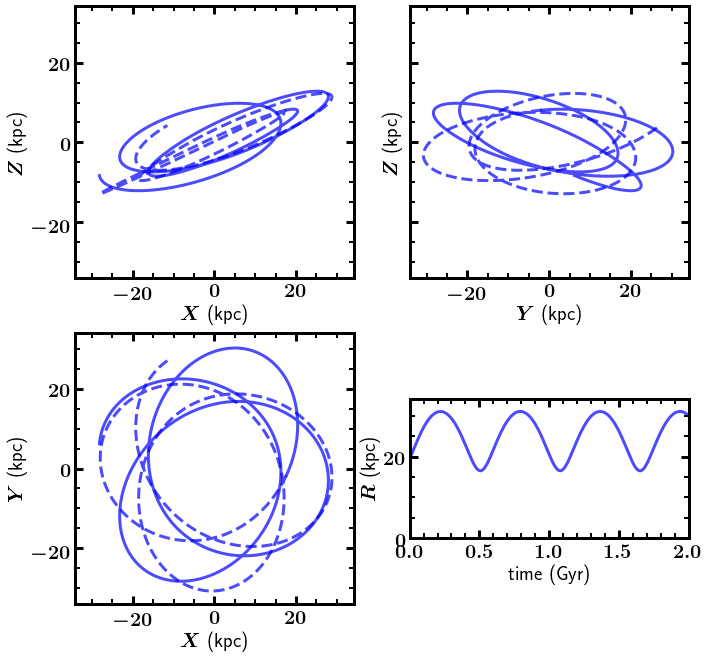

In [207]:
plt.figure(figsize=(11,11))

ax1=plt.subplot(221)

plt.xlim(-1.0*maxplotdist,maxplotdist)
plt.ylim(-1.0*maxplotdist,maxplotdist)
#plt.xlim(-315,315)
#plt.ylim(-315,315)

ax1.plot(oo0.x(ts),oo0.z(ts),'b',alpha=0.7)
ax1.plot(oo0back.x(ts),oo0back.z(ts),'b--',alpha=0.7)

y1lab = r'$Z$ (kpc)'
plt.ylabel(y1lab)
x1lab = r'$X$ (kpc)'
plt.xlabel(x1lab)

ax1.minorticks_on()

ax2=plt.subplot(222,sharey=ax1)

plt.xlim(-1.0*maxplotdist,maxplotdist)
plt.ylim(-1.0*maxplotdist,maxplotdist)
#plt.xlim(-315,315)
#plt.ylim(-315,315)

#Set y-ticks of subplot 2 invisible
plt.setp(ax2.get_yticklabels(), visible=False)

ax2.plot(oo0.y(ts),oo0.z(ts),'b',alpha=0.7)
ax2.plot(oo0back.y(ts),oo0back.z(ts),'b--',alpha=0.7)

x2lab = r'$Y$ (kpc)'
plt.xlabel(x2lab)
y2lab = r'$Z$ (kpc)'
plt.ylabel(y2lab)

ax2.minorticks_on()

ax3=plt.subplot(223,sharex=ax1)

plt.xlim(-1.0*maxplotdist,maxplotdist)
plt.ylim(-1.0*maxplotdist,maxplotdist)
#plt.xlim(-315,315)
#plt.ylim(-315,315)

ax3.plot(oo0.x(ts),oo0.y(ts),'b',alpha=0.7)
ax3.plot(oo0back.x(ts),oo0back.y(ts),'b--',alpha=0.7)

y3lab = r'$Y$ (kpc)'
x3lab = r'$X$ (kpc)'
plt.ylabel(y3lab)
plt.xlabel(x3lab)

ax3.minorticks_on()

ax4=plt.subplot(224)
ax4.set_aspect(0.5*maxtime/maxplotdist)

plt.xlim(0,maxtime)
plt.ylim(0,maxplotdist)

ax4.plot(ts,oo0.r(ts),'b',alpha=0.7)

y4lab = r'$R$ (kpc)'
x4lab = r'time (Gyr)'
plt.ylabel(y4lab)
plt.xlabel(x4lab)

ax4.minorticks_on()

#plt.savefig('booiii_bhbstars_orbit.pdf')
plt.show()


Find the inflection points in R vs. time, so we can estimate the orbital period:

In [208]:
rgc = oo0.r(ts)
rgrad = np.gradient(rgc)
mins = 0.0*rgrad
for i in range(len(rgrad)-1): 
    if ((rgrad[i] > 0) & (rgrad[i+1] < 0)): mins[i]=1
    if ((rgrad[i] < 0) & (rgrad[i+1] > 0)): mins[i]=1


In [209]:
turning_points = ts[np.abs(mins-1.0) < 0.01]

In [210]:
# Print some of the orbital parameters:
print('Pericenter (kpc): ',oo0.rperi())
print('Apocenter (kpc): ',oo0.rap())
print('Eccentricity: ',oo0.e())
print('mean period: ',2.0*np.median(turning_points.diff()))
# period is 2X the time span between min/max in R

Pericenter (kpc):  16.528536126337073
Apocenter (kpc):  31.068596505518396
Eccentricity:  0.30548185521264054
mean period:  0.5725725725725725 Gyr
